# Estimating Counts

> “A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.”

Based on this observation, we know the railroad has 60 or more locomotives. But how many more? To apply Bayesian reasoning, we can break this problem into two steps:

- What did we know about `N` before we saw the data?
- For any given value of `N`, what is the likelihood of seeing the data (a locomotive with number 60)?

The answer to the first question is the prior. 

The answer to the second is the likelihood.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [10]:
def update_train(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [11]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

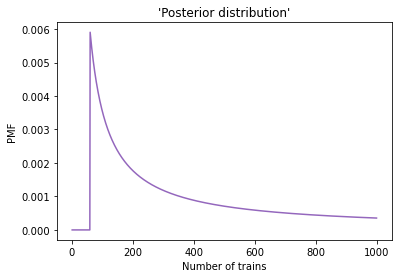

In [14]:
posterior.plot(label='Posterior after train 60', color='C4')
plt.xlabel("Number of trains")
plt.ylabel("PMF")
plt.title("'Posterior distribution'");

In [15]:
posterior.max_prob()

60

The mean of the posterior is 333, so that might be a good guess if you want to minimize error. If you played this guessing game over and over, using the mean of the posterior as your estimate would minimize the mean squared error over the long run.

In [17]:
posterior.mean()

333.41989326370776

In [18]:
import pandas as pd

df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    update_train(pmf, data=60)
    df.loc[high] = pmf.mean()
    
df

,Posterior mean
Upper bound,
500,207.079228
1000,333.419893
2000,552.179017


As we vary the upper bound, the posterior mean changes substantially. So that’s bad.

When the posterior is sensitive to the prior, there are two ways to proceed:

Get more data.
Get more background information and choose a better prior.

In [20]:
# What if in addition to train 60 we see train 30 and train 90
df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    for data in dataset:
        update_train(pmf, data)
    df.loc[high] = pmf.mean()
    
df

,Posterior mean
Upper bound,
500,151.849588
1000,164.305586
2000,171.338181
